# Projeto Final: Experimento de "fine-tuning" de um modelo ViT (Vision Transformer) para classificação de imagens

Disciplina: Visão Computacional

Professor: Tsang Ing Ren 

Aluno: Laureano Montarroyos Fo

Especialização Deep Learning - Turma 2022/2023

Cin.AI - UFPE

O presente trabalho tem por finalidade o experimento didático de realizar o "fine-tuning" de um modelo ViT (Vision Transformer) para classificação de imagens, tarefa típica do segmento de visão computacional.

Descrito no artigo de autoria de  Alexey Dosovitskiy, Lucas Beyer, Alexander Kolesnikov e outros (2021), publicação que pode ser localizada no endereço https://arxiv.org/pdf/2010.11929.pdf, os autores propõem uma abordagem para o reconhecimento de imagens usando Transformers, arquitetura que tem alcançado ótimos resultados em tarefas do processamento de linguagem natural.

O conceito central do artigo é substituir a abordagem tradicional de processamento de imagens, que trata as imagens como uma grade de pixels, por uma representação textual. Eles dividem a imagem em patches de 16x16 pixels e codificam cada patch em um vetor de palavras (Embedded Patches). Esses vetores de palavras são então adicionados a vetores posicionais (Posicional embeddings) e alimentados em um modelo Transformer para análise.

Em síntese, o ViT substitui a entrada de texto por patches da imagem, aplicando as mesmas operações de atenção (self-attention layers) e transformação linear, presentes na estrutura tradicional do "Codificador" (Encoder) de um Transformer, de forma a capturar as informações importantes para a construção de uma representação latente, a qual poderá ser aplicada, em última análise, a tarefas específicas da visão computacional, como classificação de imagem ou detecção de objetos.

O ViT (Vision Transformer) é treinado em um grande número de imagens e mostra resultados promissores em diferentes conjuntos de dados de referência, em termos de precisão e escalabilidade, em comparação com modelos tradicionais de convolução.



## Dataset "cats_vs_dogs" hospedado na "Hugging Face"
Como fonte de dados, utilizou-se um subconjunto formado por imagens de gatos e cães do "dataset" conhecido como "Asirra" (Animal Species Image Recognition for Restricting Access). Desse "dataset" hospedado na plataforma "Hugging Face" (https://huggingface.co/datasets/cats_vs_dogs), utilizou-se 8.427 imagens para o fine-tune deste trabalho, o que corresponde a cerca de 50% do conteúdo.

Sobre o "dataset" Asirra hospedado na plataforma "Kaggle"(https://www.kaggle.com/c/dogs-vs-cats), origem do subconjunto presente na "Hugging Face", segue, abaixo, trecho da descrição extraída do "Kaggle" e mantida na língua original em inglês:

The Asirra data set

Web services are often protected with a challenge that's supposed to be easy for people to solve, but difficult for computers. Such a challenge is often called a CAPTCHA (Completely Automated Public Turing test to tell Computers and Humans Apart) or HIP (Human Interactive Proof). HIPs are used for many purposes, such as to reduce email and blog spam and prevent brute-force attacks on web site passwords.

Asirra (Animal Species Image Recognition for Restricting Access) is a HIP that works by asking users to identify photographs of cats and dogs. This task is difficult for computers, but studies have shown that people can accomplish it quickly and accurately. Many even think it's fun! Here is an example of the Asirra interface:

Asirra is unique because of its partnership with Petfinder.com, the world's largest site devoted to finding homes for homeless pets. They've provided Microsoft Research with over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States. Kaggle is fortunate to offer a subset of this data for fun and research. 


Preparando ambiente intalando bibliotecas para uso de transformers

In [ ]:
!pip install transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.0 MB/s eta 0:00:00


## Leitura do Dataset

Para carga e preparação do dataset "cats_vs_dogs" hospedado na platagorma "hugging face"🤗, utilizaremos a biblioteca datasets.

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 23.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

train_ds = load_dataset('cats_vs_dogs', split='train')

# embaralhando os dados antes de dividir o dataset nos conjuntos de treinamento, validação e teste
train_ds.shuffle(seed=12321)

# recuperando apenas a metada do dataset para trabalhar
splits = train_ds.train_test_split(test_size=0.5)
train_ds = splits['train']

# dividindo dataset nos conjuntos de treinamento e teste
splits = train_ds.train_test_split(test_size=0.2)
train_ds = splits['train']
test_ds = splits['test']

# dividindo conjunto de treinamento nos conjuntos de treinamento e validação
splits = train_ds.train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']

Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/.cache/huggingface/datasets/cats_vs_dogs/default/1.0.0/d4fe9cf31b294ed8639aa58f7d8ee13fe189011837038ed9a774fde19a911fcb. Subsequent calls will reuse this data.


In [ ]:
train_ds

Dataset({
    features: ['image', 'labels'],
    num_rows: 8427
})

In [ ]:
test_ds

Dataset({
    features: ['image', 'labels'],
    num_rows: 2341
})

In [ ]:
val_ds

Dataset({
    features: ['image', 'labels'],
    num_rows: 937
})

In [ ]:
train_ds.features

{'image': Image(decode=True, id=None),
 'labels': ClassLabel(names=['cat', 'dog'], id=None)}

Examinando a imagem e seu label correspondente da posição inicial do conjunto de treinamento:

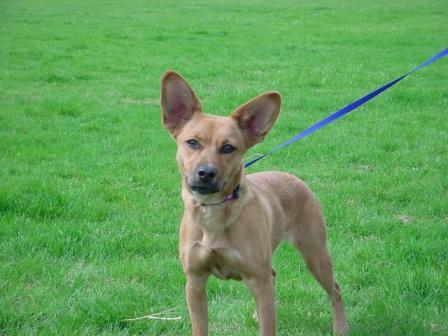

In [ ]:
train_ds[0]['image']

In [ ]:
train_ds[0]['labels']

1

Criando dicionários que mapeiam o índice para a classe e a classe para o índice, de maneira a facilitar a recuperação de cada uma das informações a partir da posse da outra:

In [ ]:
id2label = {id:label for id, label in enumerate(train_ds.features['labels'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'cat', 1: 'dog'}

In [ ]:
id2label[train_ds[0]['labels']]

'dog'

## Pré-processamento dos dados

In [ ]:
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

Fazendo uso do "torchvision" para "data augmentation".

In [ ]:
from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

In [ ]:
# Set the transforms
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
test_ds.set_transform(val_transforms)

In [ ]:
from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["labels"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

train_dataloader = DataLoader(train_ds, collate_fn=collate_fn, batch_size=4)

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k, v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


## Definição do modelo

Faz-se uso do modelo `ViTForImageClassification`, o qual adiciona uma camada densa no topo de um modelo Vit pré-treinado. O modelo está no endereço https://huggingface.co/google/vit-base-patch16-224-in21k, onde podem ser consultados maiores detalhes sobre o pré-treinamento.

In [ ]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k',
                                                  id2label=id2label,
                                                  label2id=label2id)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer

metric_name = "accuracy"

args = TrainingArguments(
    f"test-cats_vs_dogs",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

In [ ]:
import torch

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)

## Fine-tuning do Modelo VIT


Faz-se uso da biblioteca "trainer", também da "hugging face"🤗, para realizar o "fine-tunning" do modelo.

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.124600,0.026651,0.994664
2,0.049100,0.029582,0.993597
3,0.033400,0.030337,0.993597


TrainOutput(global_step=2529, training_loss=0.060513153383504645, metrics={'train_runtime': 405.0767, 'train_samples_per_second': 62.41, 'train_steps_per_second': 6.243, 'total_flos': 1.9590749894465004e+18, 'train_loss': 0.060513153383504645, 'epoch': 3.0})

## Avaliando modelo após fine-tuning no conjunto de testes

In [ ]:
outputs = trainer.predict(test_ds)

In [ ]:
print(outputs.metrics)

{'test_loss': 0.02103990502655506, 'test_accuracy': 0.9935924818453652, 'test_runtime': 21.1036, 'test_samples_per_second': 110.929, 'test_steps_per_second': 27.768}


In [ ]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = train_ds.features['labels'].names


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names= labels))

              precision    recall  f1-score   support

         cat       1.00      0.99      0.99      1153
         dog       0.99      1.00      0.99      1188

    accuracy                           0.99      2341
   macro avg       0.99      0.99      0.99      2341
weighted avg       0.99      0.99      0.99      2341



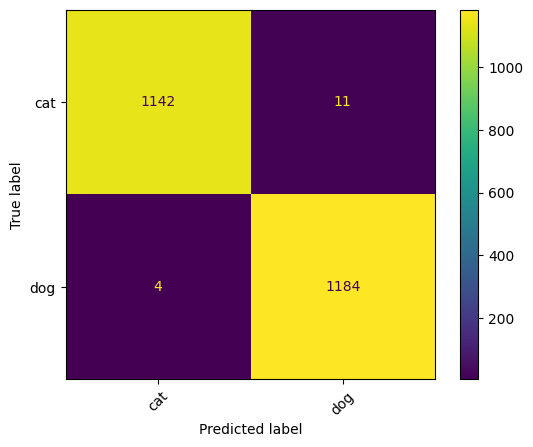

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)

## Comparando resultados com modelo da kaggle

In [ ]:
!pip install -q transformers

In [ ]:
import transformers
from transformers import pipeline

In [ ]:
pipe = pipeline(model="nateraw/vit-base-cats-vs-dogs")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
test_ds

Dataset({
    features: ['image', 'labels'],
    num_rows: 2341
})

In [ ]:
test_ds.num_rows

2341

In [ ]:
test_ds_list=[]
test_ds_labels=[]
for i in range(test_ds.num_rows):
  test_ds_list.append(test_ds[i]['image'])
  test_ds_labels.append(test_ds[i]['labels'])

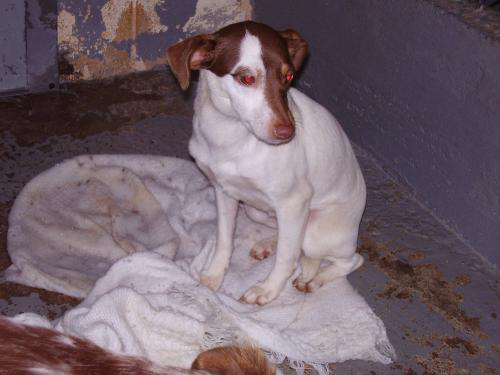

In [ ]:
test_ds[0]['image']

In [ ]:
resultado = pipe(test_ds_list)

In [ ]:
previsoes=[]
for i in range(len(resultado)):
  previsoes.append(label2id[resultado[i][0]['label']])

In [ ]:
y_true = test_ds_labels
y_pred = previsoes
labels = train_ds.features['labels'].names

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names= labels))

              precision    recall  f1-score   support

         cat       1.00      1.00      1.00      1153
         dog       1.00      1.00      1.00      1188

    accuracy                           1.00      2341
   macro avg       1.00      1.00      1.00      2341
weighted avg       1.00      1.00      1.00      2341



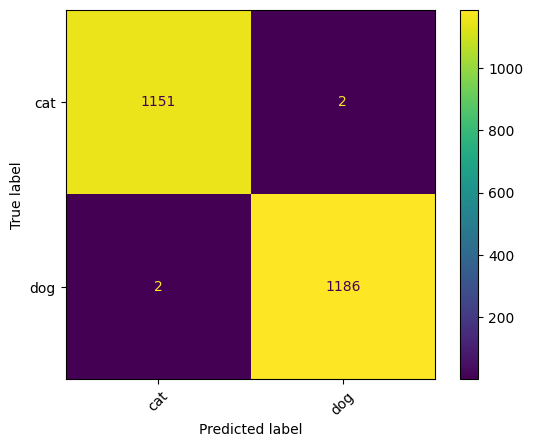

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)